In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

from keras import backend as K
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

#Escalado de los datos

scaler =  StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
y_train_scaled = df_train.pop('MEDV')

scaler =  StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
y_test_scaled = df_test.pop('MEDV')

y_train_scaled = y_train_scaled.values.reshape(-1,1)
y_test_scaled = y_test_scaled.values.reshape(-1,1)


In [3]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
CRIM       379 non-null float64
ZN         379 non-null float64
INDUS      379 non-null float64
NOX        379 non-null float64
RM         379 non-null float64
AGE        379 non-null float64
DIS        379 non-null float64
RAD        379 non-null float64
TAX        379 non-null float64
PTRATIO    379 non-null float64
B          379 non-null float64
LSTAT      379 non-null float64
MEDV       379 non-null float64
CHAS_0     379 non-null float64
CHAS_1     379 non-null float64
dtypes: float64(15)
memory usage: 44.5 KB


In [4]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

**B)**

In [12]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer="uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(1,init = 'uniform'))
model.add(Activation('linear'))

sgd = SGD(lr = 0.01)
model.compile(optimizer = sgd, loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/cpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 610us/step - loss: 96.7592 - val_loss: 42.9810
Epoch 2/300
379/379 [==============================] - 0s 135us/step - loss: 29.4870 - val_loss: 35.5884
Epoch 3/300
379/379 [==============================] - 0s 122us/step - loss: 22.7046 - val_loss: 27.4138
Epoch 4/300
379/379 [==============================] - 0s 126us/step - loss: 17.5956 - val_loss: 23.0593
Epoch 5/300
379/379 [==============================] - ETA: 0s - loss: 16.89 - 0s 139us/step - loss: 14.2330 - val_loss: 19.9779
Epoch 6/300
379/379 [==============================] - 0s 110us/step - loss: 12.5317 - val_loss: 17.5607
Epoch 7/300
379/379 [==============================] - 0s 138us/step - loss: 10.8120 - val_loss: 17.7019
Epoch 8/300
379/379 [==============================] - 0s 135us/step - loss: 11.0896 - val_loss: 14.1956
Epoch 9/300
379/379 [==============================] - 0s 139us/step - loss: 8.8021 - val_

Epoch 79/300
379/379 [==============================] - 0s 114us/step - loss: 0.2285 - val_loss: 0.2948
Epoch 80/300
379/379 [==============================] - 0s 133us/step - loss: 0.2268 - val_loss: 0.2779
Epoch 81/300
379/379 [==============================] - 0s 116us/step - loss: 0.2186 - val_loss: 0.3377
Epoch 82/300
379/379 [==============================] - 0s 117us/step - loss: 0.2309 - val_loss: 0.2302
Epoch 83/300
379/379 [==============================] - 0s 122us/step - loss: 0.2239 - val_loss: 0.2752
Epoch 84/300
379/379 [==============================] - 0s 110us/step - loss: 0.2082 - val_loss: 0.2650
Epoch 85/300
379/379 [==============================] - 0s 122us/step - loss: 0.2175 - val_loss: 0.2760
Epoch 86/300
379/379 [==============================] - 0s 116us/step - loss: 0.2137 - val_loss: 0.2343
Epoch 87/300
379/379 [==============================] - 0s 142us/step - loss: 0.2011 - val_loss: 0.2685
Epoch 88/300
379/379 [==============================] - 0s 130us

379/379 [==============================] - 0s 130us/step - loss: 0.1040 - val_loss: 0.2116
Epoch 236/300
379/379 [==============================] - 0s 134us/step - loss: 0.1070 - val_loss: 0.1389
Epoch 237/300
379/379 [==============================] - 0s 161us/step - loss: 0.1042 - val_loss: 0.1910
Epoch 238/300
379/379 [==============================] - 0s 148us/step - loss: 0.1062 - val_loss: 0.1583
Epoch 239/300
379/379 [==============================] - 0s 146us/step - loss: 0.1024 - val_loss: 0.1998
Epoch 240/300
379/379 [==============================] - 0s 156us/step - loss: 0.1014 - val_loss: 0.2521
Epoch 241/300
379/379 [==============================] - 0s 152us/step - loss: 0.1043 - val_loss: 0.2323
Epoch 242/300
379/379 [==============================] - 0s 131us/step - loss: 0.1014 - val_loss: 0.1954
Epoch 243/300
379/379 [==============================] - 0s 132us/step - loss: 0.1053 - val_loss: 0.1467
Epoch 244/300
379/379 [==============================] - 0s 130us/ste

In [12]:
#obtencion de pesos del modelo entrenado despues de 300 epochs
loss1 = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights

gradients = K.gradients(loss1, listOfVariableTensors)
sess1 = K.get_session()
evaluated_gradients = sess1.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})


evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
#obtener pesos antes del entrenamiento
loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
listOfVariableTensors_before = model_before.trainable_weights

gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
sess_before = K.get_session()
evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]

In [9]:
def tensor_of_gradients(model_before,model_after):
    #obtencion de pesos del modelo entrenado despues de 300 epochs
    loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
    listOfVariableTensors = model.trainable_weights

    gradients = K.gradients(loss, listOfVariableTensors)
    sess1 = K.get_session()
    evaluated_gradients = sess1.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
    evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
    
    #obtener pesos antes del entrenamiento
    loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
    listOfVariableTensors_before = model_before.trainable_weights
    
    gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
    sess_before = K.get_session()
    evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
    evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]
    return evaluated_gradients_before, evaluated_gradients

In [7]:
def plot_weight_before_and_after(evaluated_gradients_before,evaluated_gradients_after):
    plt.close('all')
    f, axarr = plt.subplots(2, sharey=True,figsize=(8,8))
    
    axarr[0].set_title('Distribución de pesos antes de entrenar')
    axarr[1].set_title('Distribución de pesos después de entrenar')
    
    axarr[0].hist(evaluated_gradients_before)
    axarr[1].hist(evaluated_gradients_after)
    
    plt.ylabel('Frecuencia')
    plt.xlabel('Valor')
    
    plt.show()
    

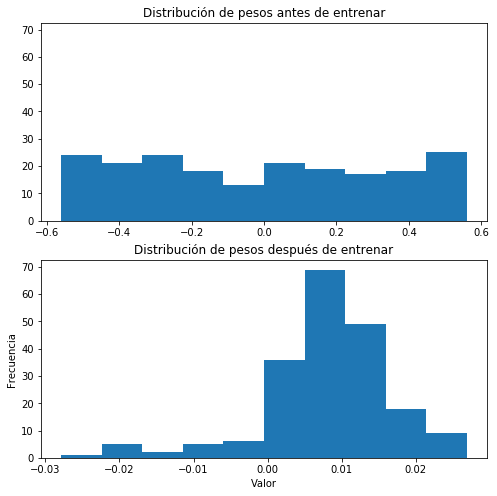

In [13]:
#plt.hist(evaluated_gradients1[1])
#plt.hist(evaluated_gradients2[1])
#plt.title("Histograma despues de entrenar 300 epochs")
#plt.xlabel("Value")
#plt.ylabel("Frequency")
#plt.legend(['Despues', 'Antes'], loc='upper left')
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])



Se lográ apreciar claramente la distribución uniforme, $-1/\sqrt{N}$ y $1/\sqrt{N}$,( https://github.com/keras-team/keras/blob/master/keras/initializers.py#L49 ) y se ve la reorganización de los pesos luego de 300 epochs.

**C)**

In [15]:
#Modelo profundo a usar
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/cpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 1ms/step - loss: 130.6499 - val_loss: 87.4251
Epoch 2/300
379/379 [==============================] - 0s 182us/step - loss: 98.6253 - val_loss: 102.5265
Epoch 3/300
379/379 [==============================] - 0s 196us/step - loss: 86.9833 - val_loss: 82.5412
Epoch 4/300
379/379 [==============================] - 0s 184us/step - loss: 90.1605 - val_loss: 90.7290
Epoch 5/300
379/379 [==============================] - 0s 192us/step - loss: 91.8138 - val_loss: 95.0245
Epoch 6/300
379/379 [==============================] - 0s 181us/step - loss: 91.8764 - val_loss: 103.2109
Epoch 7/300
379/379 [==============================] - 0s 208us/step - loss: 90.1478 - val_loss: 86.4255
Epoch 8/300
379/379 [==============================] - 0s 194us/step - loss: 88.2243 - val_loss: 82.1501
Epoch 9/300
379/379 [==============================] - 0s 187us/step - loss: 101.1895 - val_loss: 87.4000
Epoch 1

Epoch 78/300
379/379 [==============================] - 0s 168us/step - loss: 86.6392 - val_loss: 80.8754
Epoch 79/300
379/379 [==============================] - 0s 157us/step - loss: 85.4713 - val_loss: 81.8034
Epoch 80/300
379/379 [==============================] - 0s 183us/step - loss: 85.7271 - val_loss: 86.9979
Epoch 81/300
379/379 [==============================] - 0s 190us/step - loss: 81.5064 - val_loss: 83.0266
Epoch 82/300
379/379 [==============================] - 0s 176us/step - loss: 80.6451 - val_loss: 77.2640
Epoch 83/300
379/379 [==============================] - 0s 164us/step - loss: 80.1878 - val_loss: 95.7524
Epoch 84/300
379/379 [==============================] - 0s 177us/step - loss: 75.0339 - val_loss: 71.4834
Epoch 85/300
379/379 [==============================] - 0s 176us/step - loss: 67.5015 - val_loss: 59.2922
Epoch 86/300
379/379 [==============================] - 0s 187us/step - loss: 51.3349 - val_loss: 47.5637
Epoch 87/300
379/379 [========================

379/379 [==============================] - 0s 222us/step - loss: 1.3517 - val_loss: 0.6601
Epoch 234/300
379/379 [==============================] - 0s 181us/step - loss: 0.7255 - val_loss: 0.2216
Epoch 235/300
379/379 [==============================] - 0s 197us/step - loss: 0.2198 - val_loss: 0.4003
Epoch 236/300
379/379 [==============================] - 0s 200us/step - loss: 0.2038 - val_loss: 0.4781
Epoch 237/300
379/379 [==============================] - 0s 229us/step - loss: 0.2967 - val_loss: 1.0952
Epoch 238/300
379/379 [==============================] - 0s 212us/step - loss: 0.4381 - val_loss: 0.9607
Epoch 239/300
379/379 [==============================] - 0s 179us/step - loss: 0.2992 - val_loss: 0.4785
Epoch 240/300
379/379 [==============================] - 0s 202us/step - loss: 0.3516 - val_loss: 1.0804
Epoch 241/300
379/379 [==============================] - 0s 190us/step - loss: 0.2967 - val_loss: 0.4726
Epoch 242/300
379/379 [==============================] - 0s 168us/ste

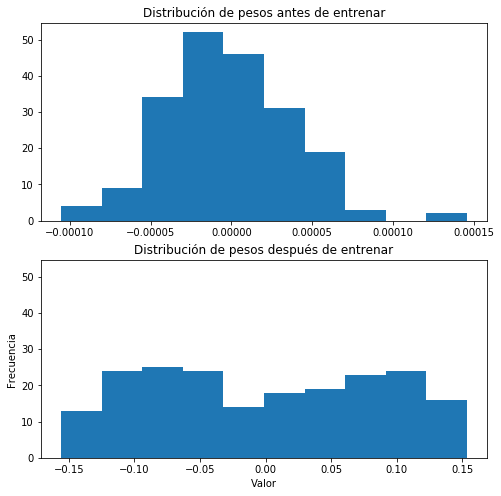

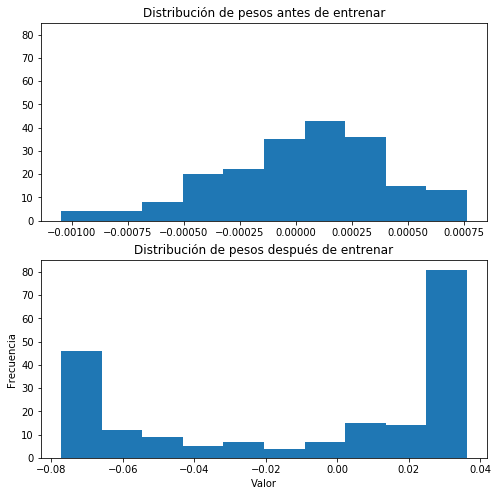

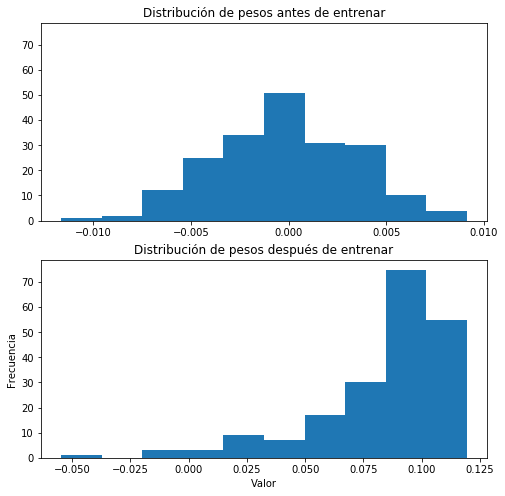

In [17]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])
plot_weight_before_and_after(evaluated_gradients_before[3], evaluated_gradients[3])
plot_weight_before_and_after(evaluated_gradients_before[5], evaluated_gradients[5])

# buscar explicación de los pesos antes. 
dado a que no se ve la distribución uniforme que deberia

**D)**

In [18]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: 146.7608 - val_loss: 93.2915
Epoch 2/300
379/379 [==============================] - 0s 124us/step - loss: 92.6766 - val_loss: 83.4963
Epoch 3/300
379/379 [==============================] - 0s 102us/step - loss: 89.1107 - val_loss: 86.8799
Epoch 4/300
379/379 [==============================] - 0s 115us/step - loss: 94.6729 - val_loss: 97.5117
Epoch 5/300
379/379 [==============================] - 0s 111us/step - loss: 91.4776 - val_loss: 81.9087
Epoch 6/300
379/379 [==============================] - 0s 107us/step - loss: 86.3285 - val_loss: 83.0379
Epoch 7/300
379/379 [==============================] - 0s 111us/step - loss: 87.4087 - val_loss: 93.6281
Epoch 8/300
379/379 [==============================] - 0s 106us/step - loss: 89.7659 - val_loss: 90.2540
Epoch 9/300
379/379 [==============================] - 0s 127us/step - loss: 90.2269 - val_loss: 81.9058
Epoch 10/3

379/379 [==============================] - 0s 118us/step - loss: 0.3133 - val_loss: 0.4997
Epoch 157/300
379/379 [==============================] - 0s 94us/step - loss: 0.1815 - val_loss: 0.2050
Epoch 158/300
379/379 [==============================] - 0s 103us/step - loss: 0.2179 - val_loss: 0.1443
Epoch 159/300
379/379 [==============================] - 0s 99us/step - loss: 1.0892 - val_loss: 0.4621
Epoch 160/300
379/379 [==============================] - 0s 99us/step - loss: 1.2049 - val_loss: 0.8732
Epoch 161/300
379/379 [==============================] - 0s 107us/step - loss: 1.7436 - val_loss: 0.7638
Epoch 162/300
379/379 [==============================] - 0s 106us/step - loss: 0.3816 - val_loss: 0.2511
Epoch 163/300
379/379 [==============================] - 0s 99us/step - loss: 0.1480 - val_loss: 0.2647
Epoch 164/300
379/379 [==============================] - 0s 97us/step - loss: 0.1630 - val_loss: 0.1632
Epoch 165/300
379/379 [==============================] - 0s 98us/step - lo

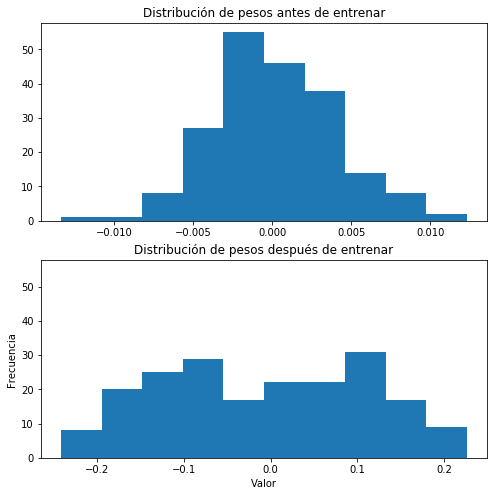

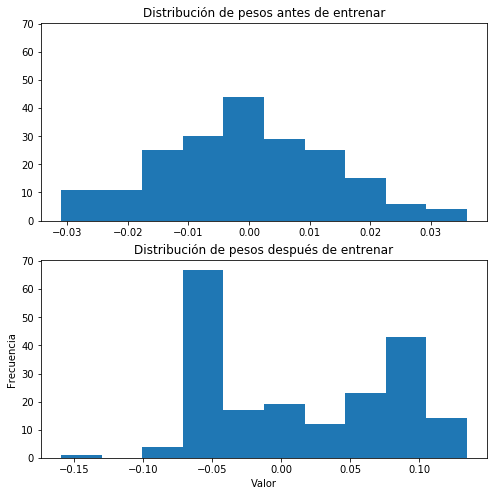

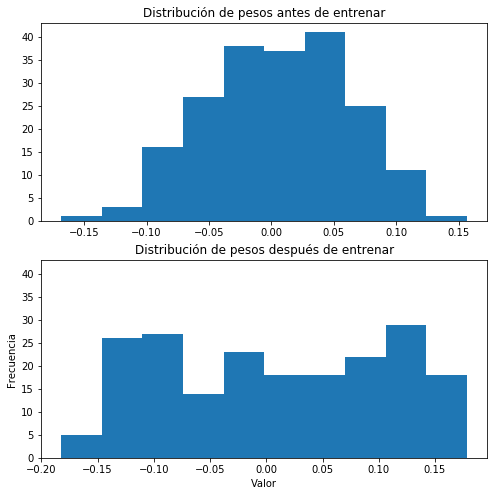

In [19]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])
plot_weight_before_and_after(evaluated_gradients_before[3], evaluated_gradients[3])
plot_weight_before_and_after(evaluated_gradients_before[5], evaluated_gradients[5])

**E)**

In [21]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: 381.4497 - val_loss: 117.1803
Epoch 2/300
379/379 [==============================] - 0s 118us/step - loss: 318.8777 - val_loss: 299.8584
Epoch 3/300
379/379 [==============================] - 0s 112us/step - loss: 153.0355 - val_loss: 66.9388
Epoch 4/300
379/379 [==============================] - 0s 127us/step - loss: 62.7700 - val_loss: 71.7447
Epoch 5/300
379/379 [==============================] - 0s 116us/step - loss: 59.9105 - val_loss: 58.8911
Epoch 6/300
379/379 [==============================] - 0s 115us/step - loss: 39.6526 - val_loss: 46.9037
Epoch 7/300
379/379 [==============================] - 0s 118us/step - loss: 46.7228 - val_loss: 38.6994
Epoch 8/300
379/379 [==============================] - 0s 116us/step - loss: 53.3656 - val_loss: 46.6844
Epoch 9/300
379/379 [==============================] - 0s 99us/step - loss: 33.2517 - val_loss: 44.2165
Epoch 1

Epoch 78/300
379/379 [==============================] - 0s 99us/step - loss: 86.9399 - val_loss: 82.1815
Epoch 79/300
379/379 [==============================] - 0s 94us/step - loss: 85.6450 - val_loss: 82.4561
Epoch 80/300
379/379 [==============================] - 0s 97us/step - loss: 86.3102 - val_loss: 82.6241
Epoch 81/300
379/379 [==============================] - 0s 94us/step - loss: 87.6678 - val_loss: 81.8745
Epoch 82/300
379/379 [==============================] - 0s 106us/step - loss: 85.7190 - val_loss: 81.9268
Epoch 83/300
379/379 [==============================] - 0s 97us/step - loss: 85.6667 - val_loss: 83.8342
Epoch 84/300
379/379 [==============================] - 0s 101us/step - loss: 86.6184 - val_loss: 81.7026
Epoch 85/300
379/379 [==============================] - 0s 99us/step - loss: 84.6740 - val_loss: 82.2929
Epoch 86/300
379/379 [==============================] - 0s 110us/step - loss: 85.6990 - val_loss: 81.8343
Epoch 87/300
379/379 [==============================

Epoch 155/300
379/379 [==============================] - 0s 99us/step - loss: 86.1436 - val_loss: 84.7760
Epoch 156/300
379/379 [==============================] - 0s 118us/step - loss: 87.0482 - val_loss: 82.2678
Epoch 157/300
379/379 [==============================] - 0s 90us/step - loss: 86.0652 - val_loss: 82.3686
Epoch 158/300
379/379 [==============================] - 0s 94us/step - loss: 86.9249 - val_loss: 83.4212
Epoch 159/300
379/379 [==============================] - 0s 97us/step - loss: 85.5692 - val_loss: 82.0008
Epoch 160/300
379/379 [==============================] - 0s 109us/step - loss: 86.4149 - val_loss: 81.8660
Epoch 161/300
379/379 [==============================] - 0s 98us/step - loss: 88.8139 - val_loss: 82.3188
Epoch 162/300
379/379 [==============================] - 0s 122us/step - loss: 85.7954 - val_loss: 82.8273
Epoch 163/300
379/379 [==============================] - 0s 95us/step - loss: 86.3153 - val_loss: 81.7535
Epoch 164/300
379/379 [====================

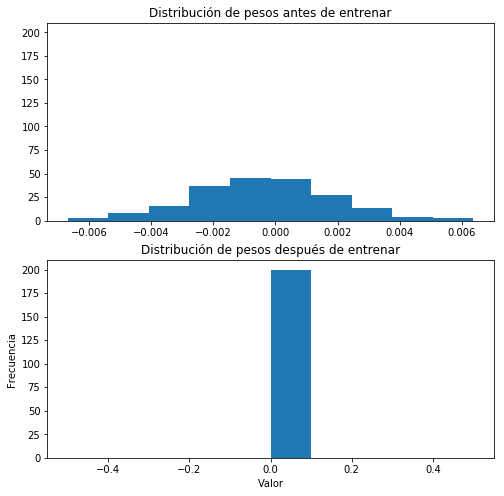

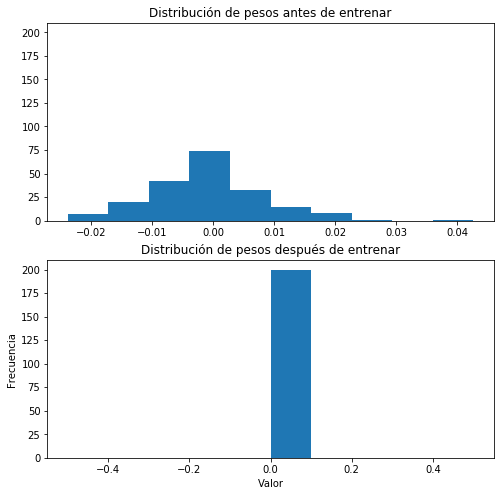

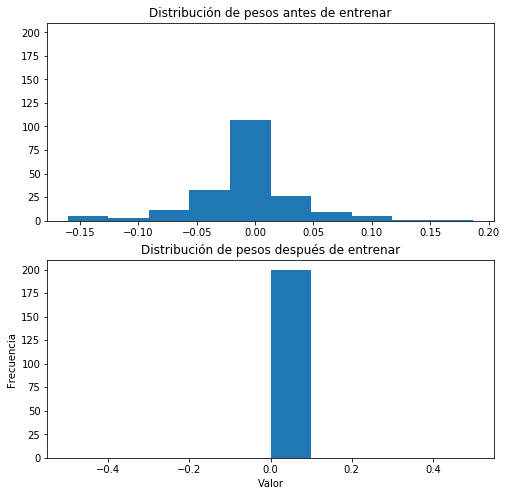

In [22]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])
plot_weight_before_and_after(evaluated_gradients_before[3], evaluated_gradients[3])
plot_weight_before_and_after(evaluated_gradients_before[5], evaluated_gradients[5])

In [23]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s 111us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 113us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 118us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 105us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 108us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 110us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 111us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 106us/step - loss: nan -

Epoch 167/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 115us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 109us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 98us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 93us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 177/300

Epoch 250/300
379/379 [==============================] - 0s 98us/step - loss: nan - val_loss: nan
Epoch 251/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 106us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 90us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 86us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 99us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 91us/step - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s 99us/step - loss: nan - val_loss: nan
Epoch 260/300
379

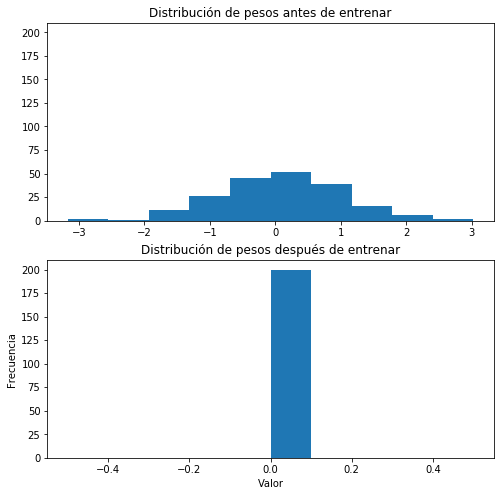

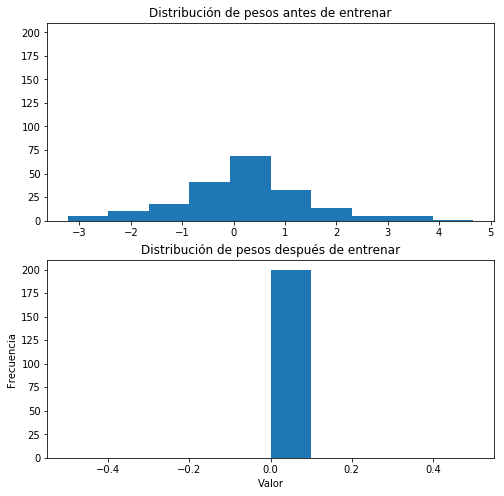

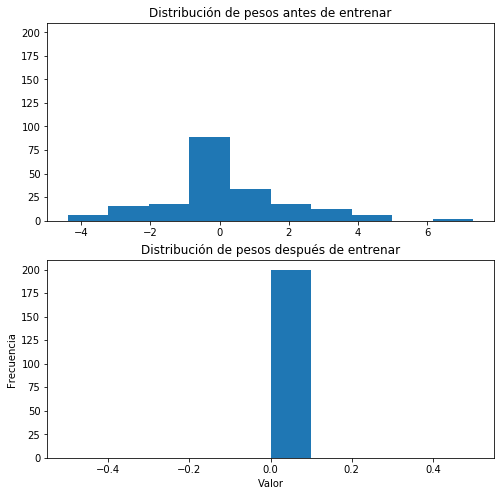

In [24]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])
plot_weight_before_and_after(evaluated_gradients_before[3], evaluated_gradients[3])
plot_weight_before_and_after(evaluated_gradients_before[5], evaluated_gradients[5])

https://en.wikipedia.org/wiki/Vanishing_gradient_problem

**F)**¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

**G)**

In [25]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 1433475407141761.2500 - val_loss: 707051371088006656.0000
Epoch 2/300
379/379 [==============================] - 0s 99us/step - loss: 25036950922447588673468558737408.0000 - val_loss: 3471591781146710151757048439635968.0000
Epoch 3/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan               
Epoch 4/300
379/379 [==============================] - 0s 99us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 119us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 91us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 104us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 106us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 115

379/379 [==============================] - 0s 82us/step - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s 101us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 105us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 83us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 89us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 104us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 90us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 115us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [======

In [ ]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])

